# Implementation of xgboost

## Dataset -
https://archive.ics.uci.edu/ml/datasets/bank+marketing

### import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
data = pd.read_csv(r'C:\Users\prave\Desktop\jupyterproject\XGboost\dataset\bank-additional\bank-additional-full.csv',sep=';')

In [3]:
pd.set_option('display.max_columns', 21)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


minimum age of customer is 17 andd max age is 98

<AxesSubplot:xlabel='age', ylabel='Count'>

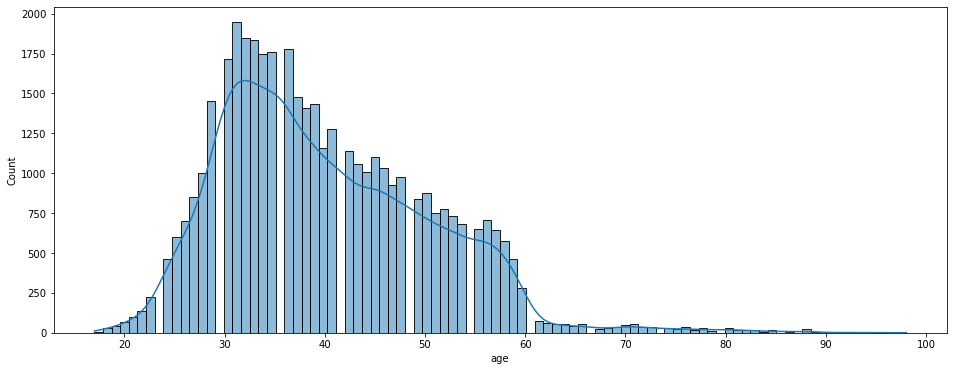

In [8]:
plt.figure(figsize=(16, 6))
sns.histplot(data['age'],kde=True,)

In [9]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

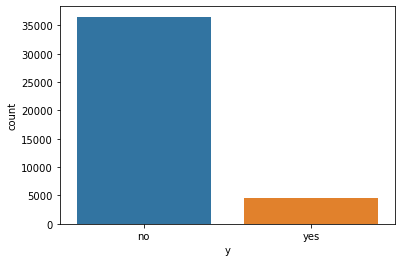

In [10]:
sns.countplot('y', data=data)


In [11]:
data.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [12]:
data.select_dtypes(include='number')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [13]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [14]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [15]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [16]:
data['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [17]:
data['housing'].unique()


array(['no', 'yes', 'unknown'], dtype=object)

In [18]:
data['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [19]:
data['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

<AxesSubplot:xlabel='housing', ylabel='count'>

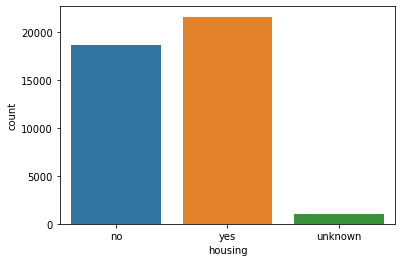

In [20]:
sns.countplot('housing', data=data)

<AxesSubplot:xlabel='loan', ylabel='count'>

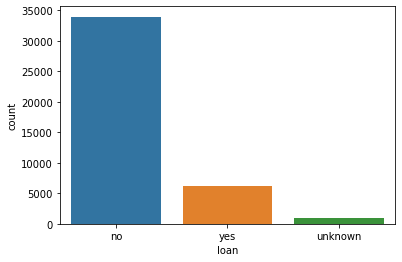

In [21]:
sns.countplot('loan', data=data)

<AxesSubplot:xlabel='job', ylabel='count'>

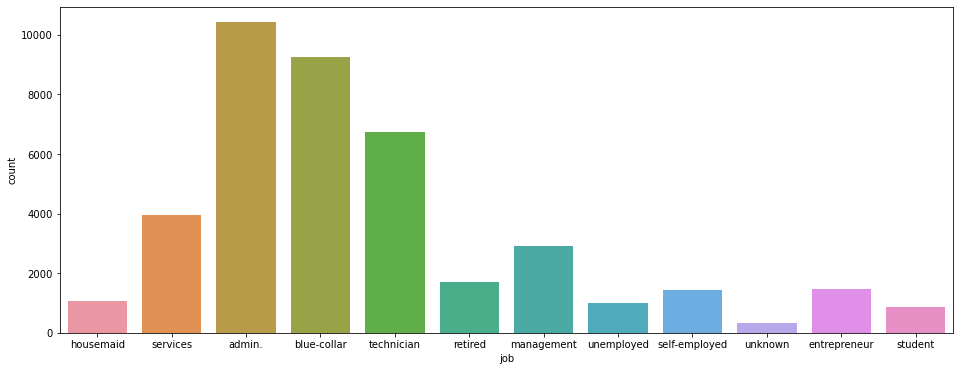

In [22]:
plt.figure(figsize=(16, 6))
sns.countplot('job', data=data)

<AxesSubplot:xlabel='education', ylabel='count'>

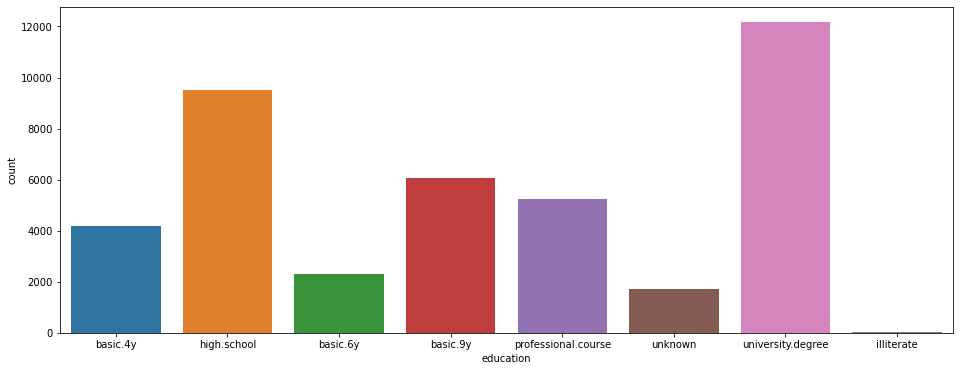

In [23]:
plt.figure(figsize=(16, 6))
sns.countplot('education', data=data)

<AxesSubplot:xlabel='marital', ylabel='count'>

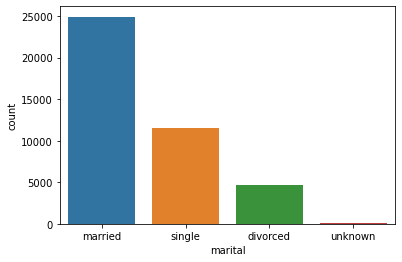

In [24]:
sns.countplot('marital', data=data)

<AxesSubplot:xlabel='month', ylabel='count'>

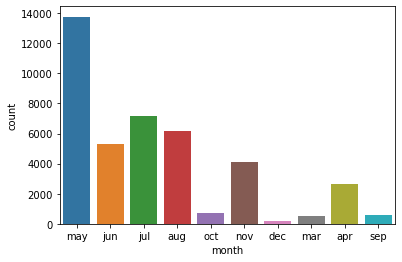

In [25]:
sns.countplot('month', data=data)

in may month highest number of people were contacted

In [26]:
data.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [27]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [28]:
x = data.drop(['y'], axis=1)
y = data['y']

In [29]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [30]:
categorical_cols= ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
numerical_cols= ['age','duration', 'campaign',  'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m','nr.employed']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x[numerical_cols])

StandardScaler()

In [32]:
x_scaled_data = pd.concat([x[categorical_cols].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(x[numerical_cols]), columns=numerical_cols)],
                    axis=1)


x_scaled_data= pd.get_dummies(x_scaled_data, columns = categorical_cols, drop_first=True)
x_scaled_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.71246,0.33168,0,...,1,0,0,0,1,0,0,0,1,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.71246,0.33168,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.71246,0.33168,0,...,1,0,0,0,1,0,0,0,1,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.71246,0.33168,0,...,1,0,0,0,1,0,0,0,1,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.71246,0.33168,0,...,1,0,0,0,1,0,0,0,1,0


In [33]:
x_scaled_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      d

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled_data,y,test_size=0.25, random_state=2)

In [35]:
x_train.shape

(30891, 52)

In [36]:
x_test.shape

(10297, 52)

In [48]:
from xgboost import XGBClassifier

In [38]:
base_model = XGBClassifier(random_state=0)
base_model.fit(x_train,y_train)


[17:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
y_pred=base_model.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9144
           1       0.63      0.53      0.58      1153

    accuracy                           0.91     10297
   macro avg       0.79      0.75      0.76     10297
weighted avg       0.91      0.91      0.91     10297



In [41]:
base_model.score(x_train,y_train)

0.9595675115729501

In [42]:
base_model.score(x_test,y_test)

0.9124016703894338

In [38]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred )
confusion

array([[8783,  361],
       [ 541,  612]], dtype=int64)

In [ ]:

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier



params={
    
    
    'learning_rate': [0.01, 0.1,0.3],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators' : [50,70,90,110],
    "gamma"            : [ 0.0,  0.2 , 0.3],
    
    
    
}

final_model = XGBClassifier(random_state=0)
final_model= GridSearchCV(final_model, params, scoring="roc_auc", n_jobs=-1, verbose=1, cv=3)
final_model.fit(x_train, y_train)
best_params = final_model.best_params_
print(f"Best paramters: {best_params})")



Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


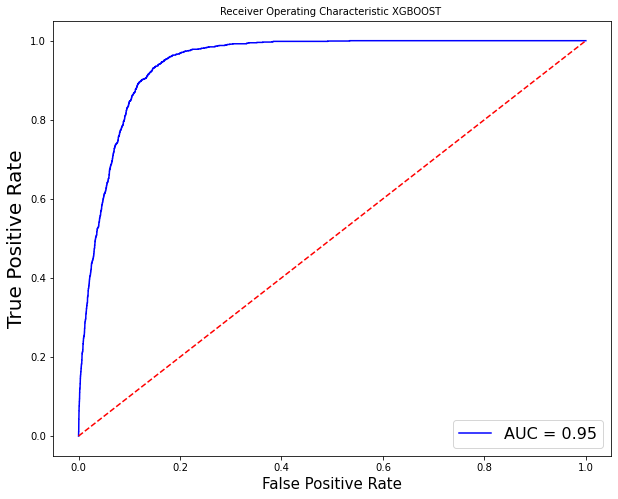

In [57]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
plt.figure(figsize=(10, 8))
probs = base_model.predict_proba(x_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

plt.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})




In [44]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority') 
X_train_over, y_train_over = oversample.fit_resample(x_scaled_data, y)

<AxesSubplot:xlabel='y', ylabel='count'>

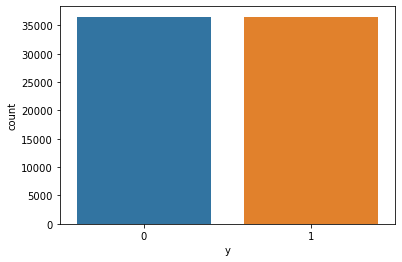

In [45]:
sns.countplot(y_train_over)

In [46]:
from sklearn.model_selection import train_test_split
x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(X_train_over,y_train_over,test_size=0.25, random_state=2)

In [50]:
base_model1 = XGBClassifier(random_state=0)
base_model1.fit(x_train_over,y_train_over)

[22:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
y_predict=base_model1.predict(x_test_over)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test_over, y_predict, ))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      9188
           1       0.89      0.98      0.93      9086

    accuracy                           0.93     18274
   macro avg       0.94      0.93      0.93     18274
weighted avg       0.94      0.93      0.93     18274



In [56]:
print('training score',base_model1.score(x_train_over,y_train_over))
print('Testing score',base_model1.score(x_test_over,y_test_over))

training score 0.9462077268249972
Testing score 0.9311590237495896


In [60]:
x_test_over.shape

(18274, 52)

In [57]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test_over, y_predict )
confusion

array([[8114, 1074],
       [ 184, 8902]], dtype=int64)

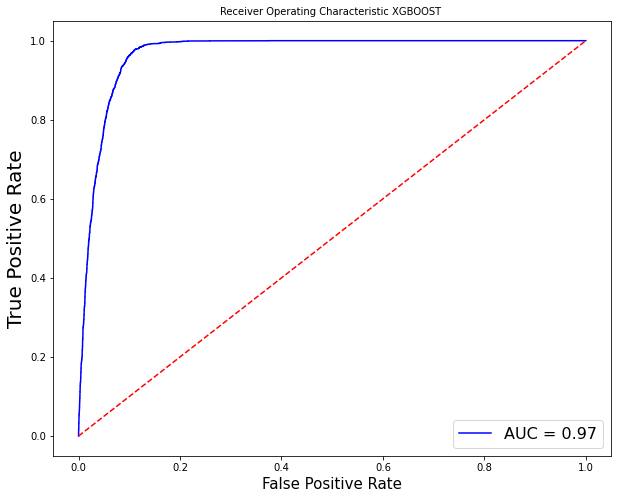

In [59]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
plt.figure(figsize=(10, 8))
probs = base_model1.predict_proba(x_test_over)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test_over, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

plt.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})


